## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Вам нужно изучить рынок российского кинопроката и выявить текущие тренды. Уделите внимание фильмам, которые получили государственную поддержку. Попробуйте ответить на вопрос, насколько такие фильмы интересны зрителю. 
Вы будете работать с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 


Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. 
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Обратите внимание, что столбец budget уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку. 


Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.

- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#данные о прокатных удостоверениях - data_mkrf_movies
data_mkrf_movies = pd.read_csv("https://code.s3.yandex.net/datasets/mkrf_movies.csv")
#данные о прокате в российских кинотеатрах - data_mkrf_shows
data_mkrf_shows= pd.read_csv('https://code.s3.yandex.net/datasets/mkrf_shows.csv')

In [3]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 1000)

Методом info() проверим тип даных и кол-во пропущенных значений

In [4]:
data_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [5]:
data_mkrf_shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


После вывода информации о дата-сетах методом info(), видно что данные о прокате в российских кинотеатрах - data_mkrf_shows значительно меньше, данные о прокатных удостоверениях - data_mkrf_movies. Их объединяет знаяения, которые хранятся в столбце "puNumber" — номер прокатного удостоверения.



Во время попытки изменить тип данных о прокатных удостоверениях - data_mkrf_movies'puNumber' имебтся значения, которые не возможно перевести в числовой тип данных

Напишем функцию, которая оставит только те строки, в которых значения в столбце 'puNumber' не являются числами. 

In [6]:
data_mkrf_movies[~data_mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
804,Паранормальный Якутск,111004112,2012-08-24T12:00:00.000Z,Художественный,ИП Тимофеев К.П.,Россия,К.Тимофеев,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data_mkrf_movies.loc[804, 'puNumber']

' 111004112'

На первый взгляд со строкой по индексу 804 все впорядке, но на выведя ее в отдельную строки, мы видим яныый строковый пробел в значении
Строка 1797 имеет строковое значение "нет", которое заменим на 0, дабы не терять значение из выборки

Можно воспользоваться методом strip() для удаления пробелов, но, к сожалению,  этот метод удаляет пробелы только в начале и в конце строки.
Воспользуемся методом replace() -  удалить все пробелы из строки, в том числе и между словами


In [8]:
data_mkrf_movies.loc[804, 'puNumber'] = data_mkrf_movies.loc[804, 'puNumber'].replace(' ', '')
data_mkrf_movies.loc[1797, 'puNumber'] = '0'

In [9]:
data_mkrf_movies[~data_mkrf_movies['puNumber'].str.isdigit()]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres


Как видим из рузультата функции str.isdigit() нет числовых значений

In [10]:
data_mkrf_movies['puNumber'] = data_mkrf_movies['puNumber'].astype('int')

In [11]:
data_mkrf_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Как видим, что тип данных в столбеце в data_mkrf_movies['puNumber'] быд изменен на int

In [12]:
data = data_mkrf_movies.merge(data_mkrf_shows, on='puNumber', how='left')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [14]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN


### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

In [15]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

In [16]:
data_miss = data.isna().sum()
data_miss

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

Определим % пропущенных значений от всего дата-фрейма

In [17]:
percent_data_miss = (data_miss / len(data)) *100
percent_data_miss

title                     0.000000
puNumber                  0.000000
show_start_date           0.000000
type                      0.000000
film_studio               0.240449
production_country        0.026717
director                  0.120224
producer                  7.587497
age_restriction           0.000000
refundable_support       95.565055
nonrefundable_support    95.565055
budget                   95.565055
financing_source         95.565055
ratings                  12.917446
genres                   13.037670
box_office               57.814587
dtype: float64

In [18]:
data['show_start_date'].unique()

array(['2015-11-27T12:00:00.000Z', '2016-09-13T12:00:00.000Z',
       '2016-10-10T12:00:00.000Z', ..., '2019-12-24T12:00:00.000Z',
       '2019-12-28T12:00:00.000Z', '2019-12-30T12:00:00.000Z'],
      dtype=object)

In [19]:
# воспользуемся функцией to_datetime для перевода столбца в тип данных date_time и методом dt.date, чтобы 
# строка выводила значение года, месяца и дня. Время нас по большому счету не волнует
data['show_start_date'] = pd.to_datetime(data['show_start_date']).dt.date
#напишем функцию для заполнения пропущенных значением "неизвестно" значений для столбцов с категориальными данными
fillna_srt_data = ['film_studio', 'production_country', 'director', 'producer', 'financing_source', 'genres']
for x in fillna_srt_data:
    data[x] = data[x].fillna(value="неизвестно")
#в началае предобработке данных было обнаружено пропущенных значений 7154, что составляет 95%
#было принято решений заполнить пропуски на 0, так как избавляться от столь больщой выборки не разумно
fillna_int_data = ['refundable_support', 'nonrefundable_support', 'budget', 'box_office']
for y in fillna_int_data:
    data[y] = data[y].fillna(value=0).astype('int')

##


'box_office'

In [20]:
print(data.loc[data['budget'] < 0, 'budget'])

Series([], Name: budget, dtype: int64)


In [21]:
# напишем фунцию main_genre, которая переберет все  виды жанра и по первому слову жанров в каждом фильме,
# оперделит его к тому или иному виду.
# применим метод map() при вызове функции к каждому элементу в столбце, и результаты сохраняются в новом столбце
def main_genre (row):
    return row.split(',')[0]
data['main_genre'] = data['genres'].map(main_genre)

In [22]:
before_genres = len(data['genres'].unique())
after_genres = len(data['main_genre'].unique())

print('Было уникальных жанров:', before_genres)
print('Стало уникальных жанров после удаления неявных дубликатов:', after_genres)

# Рассчитываем изменение в процентах
изменение_в_процентах = ((after_genres - before_genres) / before_genres) * 100

print('Изменение в процентах:', изменение_в_процентах, '%')


Было уникальных жанров: 743
Стало уникальных жанров после удаления неявных дубликатов: 29
Изменение в процентах: -96.09690444145357 %


In [23]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

In [24]:
data['type'] = data['type'].str.replace(' Художественный', 'Художественный')
data['type'] = data['type'].str.replace(' Анимационный', 'Анимационный')

In [25]:
data['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

In [26]:
data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

In [27]:
data['ratings'] = data['ratings'].astype(str)  # Преобразование всех значений в строковый тип данных
data['ratings'] = data['ratings'].str.replace('%', '')  # Удаление символов '%'
data['ratings'] = data['ratings'].astype(float)  # Преобразование в числовой тип данных
data.loc[(data['ratings'] > 10) & (data['ratings'] < 100), 'ratings'] /= 10  # Если значения больше 10 и меньше 100, делим на 10
data['ratings'] = data['ratings'].fillna(value=0)

In [28]:
data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, 0. , 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

In [29]:
data.isna().sum()

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
main_genre               0
dtype: int64

In [30]:
print('Количество дублирующихся строк:', data.duplicated().sum())


Количество дублирующихся строк: 0


In [31]:
#Из всех дубликатов нас интересует data['title'] -названия фильма. Посмотрим, с чем связан дублирующее название

In [32]:
data.loc[data['title'].duplicated(keep=False)].sort_values(by='title').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genre
455,100 миллионов евро,121013712,2012-06-06,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0,0,0,неизвестно,6.1,комедия,0,комедия
454,100 миллионов евро,221024616,2016-05-25,Художественный,"Патэ, Эсквуд, Серенити Фильм, ТФ1 Фильм Продюк...",Франция,Оливер Барру,Ричард Грандпьерр,«16+» - для детей старше 16 лет,0,0,0,неизвестно,6.1,комедия,0,комедия
4852,127 часов,121000811,2011-01-27,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0,0,0,неизвестно,7.7,"триллер,биография,драма",0,триллер
5058,127 часов,221069011,2011-05-18,Художественный,"Фокс Серчлайт Пикчерз, Клод Эйт Филмз, Филм Фо...",США - Великобритания,Дэнни Бойл,"Бернард Беллью, Тесса Росс, Гаррет Смит",«16+» - для детей старше 16 лет,0,0,0,неизвестно,7.7,"триллер,биография,драма",0,триллер
3129,13 часов: Тайные солдаты Бенгази,221019616,2016-04-19,Художественный,"Парамаунт, Дан Филмз, Латина Пикчарз,3 Арт Инт...",США,Майкл Бэй,"Майкл Бэй, Эрвин Стофф",«18+» - запрещено для детей,0,0,0,неизвестно,6.7,"боевик,триллер,драма",0,боевик


**Строки с одним и тем же названием фильма имеют разные номера прокатного удостоверения в кино, а также дату начала показов**

In [33]:
data.loc[data['puNumber'].duplicated(keep=False)].sort_values(by='puNumber').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genre
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0,0,0,неизвестно,7.4,"комедия,криминал",0,комедия
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0,0,0,неизвестно,6.8,"комедия,криминал",0,комедия
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0,0,0,неизвестно,7.0,"мелодрама,комедия",0,мелодрама
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0,0,0,неизвестно,7.6,"драма,мелодрама,история",0,драма


**Фильмы с одинаковым номером прокатного удостоверения указаны разные - возможно, произошла ошибка при вводе данных.**

#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [34]:
#Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильм
data['year'] = pd.to_datetime(data['show_start_date']).dt.year

In [35]:
# напишем фунцию main_director, которая переберет все имена, и перевое опреедлит в новый столбец
# применим метод map() при вызове функции к каждому элементу в столбце, и результаты сохраняются в новом столбце
def main_director (row):
    return row.split(',')[0]
data['main_director'] = data['director'].map(main_director)

Столбец с основным жанром фильма был создан ранее во время работы с неявными дубликатами.
Смотрите, пожалуйста, выше data['main_genre']

In [36]:
data['gov_support'] = data['refundable_support'] + data['nonrefundable_support']
data["share_support"] = data['gov_support'] / data['budget']

In [37]:
data["share_support"].median()

0.6140376284219444

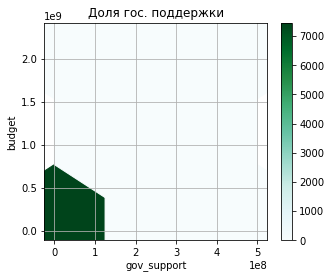

In [38]:
data.plot(x='gov_support', y='budget', kind='hexbin', gridsize=2, figsize=(5, 4), sharex=False, grid=True)
plt.title('Доля гос. поддержки')
plt.show()

Из данного объявления становится ясно, что столбец "budget" (бюджет) в некоторой таблице или датасете уже включает в себя полный объем государственной поддержки для фильмов, которые получили такую поддержку. Другими словами, сумма в столбце "budget" включает в себя как частные, так и государственные средства, предоставленные для производства фильмов.

Кроме того, уточняется, что доля государственной поддержки в общем бюджете составляет примерно 0.61. Это означает, что при расчете бюджета фильма государственные средства составляют примерно 61.4% от общей суммы.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

In [39]:
box_office_filtered = data[data['box_office'] > 0]
box_office_pivot = box_office_filtered.pivot_table(index='year', values='box_office', aggfunc=['count','mean', 'median', 'max', 'min'])
box_office_pivot.columns = ['Количество фильмов', 'Средние сборы', 'Медианные сборы', 'Максимальные', 'Минимальные']
box_office_pivot

,Количество фильмов,Средние сборы,Медианные сборы,Максимальные,Минимальные
year,,,,,
2010,101,2.404608e+04,1710.0,1446400,75
2011,109,1.293832e+05,3000.0,11618085,125
2012,123,5.654815e+04,6220.0,2311220,80
2013,179,1.664788e+05,3580.0,19957031,40
2014,273,2.727089e+07,20400.0,1016410635,50
2015,462,8.549213e+07,5003449.5,1658861425,100
2016,525,9.117390e+07,3915041.0,2048126108,200
2017,357,1.360328e+08,9968340.0,2779686144,7900
2018,475,1.045651e+08,8891102.0,2271754004,41225


count     10.000000
mean     313.400000
std      177.835255
min      101.000000
25%      137.000000
50%      315.000000
75%      471.750000
max      530.000000
Name: Количество фильмов, dtype: float64
-------------
year
2010    101
2011    109
2012    123
2013    179
2014    273
2015    462
2016    525
2017    357
2018    475
2019    530
Name: Количество фильмов, dtype: int64


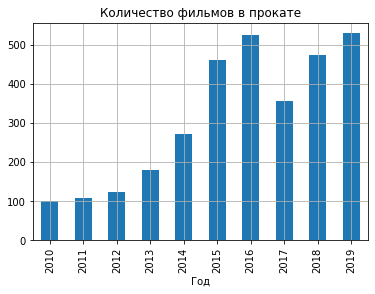

In [40]:
print(box_office_pivot['Количество фильмов'].describe())
print('-------------')
print(box_office_pivot['Количество фильмов'])
box_office_pivot['Количество фильмов'].plot(y='Количество фильмов', kind='bar', title='Количество фильмов в прокате', grid=True)
plt.xlabel('Год')
plt.show()


Количество фильмов:

- Среднее количество фильмов в год составляет 313.4.
- Медианное количество фильмов в год - 315, что означает, что половина годов имеет количество фильмов больше 315, а другая половина - меньше 315.
- Минимальное количество фильмов в год - 101, что является наименьшим значением.
- Максимальное количество фильмов в год - 530, что является наибольшим значением.
Распределение количества фильмов по годам:

- Год 2019 имеет наибольшее количество выпущенных фильмов - 530.
- Год 2010 имеет наименьшее количество выпущенных фильмов - 101.
- Произошел общий тренд на увеличение количества выпущенных фильмов от 2010 до 2019 года.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

count    1.000000e+01
mean     5.362805e+07
std      5.311703e+07
min      2.404608e+04
25%      1.386571e+05
50%      5.638151e+07
75%      9.132042e+07
max      1.360328e+08
Name: Средние сборы, dtype: float64
-------------
year
2010    2.404608e+04
2011    1.293832e+05
2012    5.654815e+04
2013    1.664788e+05
2014    2.727089e+07
2015    8.549213e+07
2016    9.117390e+07
2017    1.360328e+08
2018    1.045651e+08
2019    9.136926e+07
Name: Средние сборы, dtype: float64


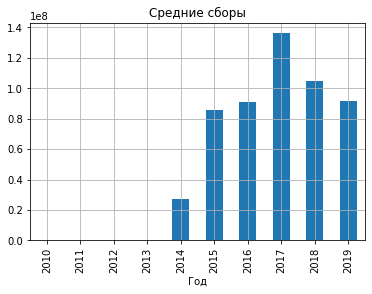

In [41]:
print(box_office_pivot['Средние сборы'].describe())
print('-------------')
print(box_office_pivot['Средние сборы'])
box_office_pivot['Средние сборы'].plot(y='Средние сборы', kind='bar', title='Средние сборы', grid=True)
plt.xlabel('Год')
plt.show()

Средние сборы за год:

- Средние сборы за год составляют в среднем 53,628,050 рублей.
- Минимальные средние сборы за год - 24,046 рублей.
- Максимальные средние сборы за год - 136,032,800 рублей.
- Медианные средние сборы за год - 56,381,510 рублей, что является средним значением в середине упорядоченного набора данных.

Распределение средних сборов по годам:

- Год 2017 имеет наибольшие средние сборы - 136,032,800 рублей.
- Год 2010 имеет наименьшие средние сборы - 24,046 рублей.

Произошел общий тренд на увеличение средних сборов с 2010 по 2017 год, после чего произошло незначительное снижение в 2018 и 2019 годах.

count    1.000000e+01
mean     3.244064e+06
std      3.872396e+06
min      1.710000e+03
25%      4.240000e+03
50%      1.967720e+06
75%      4.909537e+06
max      9.968340e+06
Name: Медианные сборы, dtype: float64
-------------
year
2010       1710.0
2011       3000.0
2012       6220.0
2013       3580.0
2014      20400.0
2015    5003449.5
2016    3915041.0
2017    9968340.0
2018    8891102.0
2019    4627798.0
Name: Медианные сборы, dtype: float64


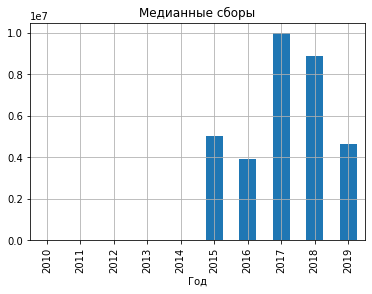

In [42]:
print(box_office_pivot['Медианные сборы'].describe())
print('-------------')
print(box_office_pivot['Медианные сборы'])
box_office_pivot['Медианные сборы'].plot(y='Медианные сборы', kind='bar', title='Медианные сборы', grid=True)
plt.xlabel('Год')
plt.show()

Медианные сборы за год:

- Средние медианные сборы за год составляют примерно 3,244,064 рублей.
- Минимальные медианные сборы за год - 1,710 рублей.
- Максимальные медианные сборы за год - 9,968,340 рублей.
- Медианные сборы находятся на уровне 1,967,720 рублей, что является значением в середине упорядоченного набора данных.

Распределение медианных сборов по годам:

- Год 2017 имеет наибольшие медианные сборы - 9,968,340 рублей.
- Год 2010 имеет наименьшие медианные сборы - 1,710 рублей.

Произошло значительное увеличение медианных сборов с 2010 по 2017 год, после чего снижение в 2018 и 2019 годах.

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

count    1.000000e+01
mean     1.288374e+09
std      1.234483e+09
min      1.446400e+06
25%      1.370282e+07
50%      1.337636e+09
75%      2.215847e+09
max      3.073569e+09
Name: Максимальные, dtype: float64
-------------
year
2010       1446400
2011      11618085
2012       2311220
2013      19957031
2014    1016410635
2015    1658861425
2016    2048126108
2017    2779686144
2018    2271754004
2019    3073568690
Name: Максимальные, dtype: int64


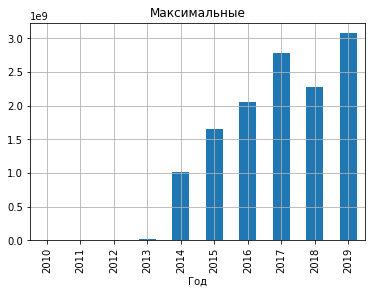

In [43]:
print(box_office_pivot['Максимальные'].describe())
print('-------------')
print(box_office_pivot['Максимальные'])
box_office_pivot['Максимальные'].plot(y='Максимальные', kind='bar', title='Максимальные', grid=True)
plt.xlabel('Год')
plt.show()

Максимальные сборы за год:

- Средние максимальные сборы за год составляют около 1,288,374,000 рублей.
- Минимальные максимальные сборы за год - 1,446,400 рублей.
- Максимальные максимальные сборы за год - 3,073,569,000 рублей.
- Медианные максимальные сборы составляют 1,337,636,000 рублей.

Распределение максимальных сборов по годам:

- Год 2019 имеет наибольшие максимальные сборы - 3,073,569,000 рублей.
- Год 2010 имеет наименьшие максимальные сборы - 1,446,400 рублей.
- Произошел общий тренд на увеличение максимальных сборов с 2010 по 2019 год.

Этот анализ позволяет лучше понять распределение максимальных сборов за год в исследуемом периоде. Год 2019 выделяется как год с самыми высокими максимальными сборами, в то время как 2010 - год с наименьшими максимальными сборами. 


count       10.000000
mean      5419.300000
std      12856.674246
min         40.000000
25%         76.250000
50%        112.500000
75%       3348.500000
max      41225.000000
Name: Минимальные, dtype: float64
-------------
year
2010       75
2011      125
2012       80
2013       40
2014       50
2015      100
2016      200
2017     7900
2018    41225
2019     4398
Name: Минимальные, dtype: int64


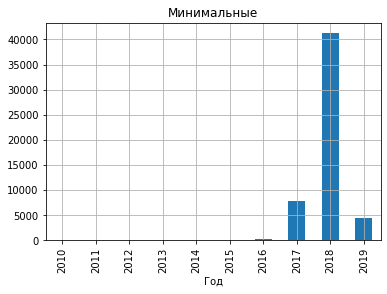

In [44]:
print(box_office_pivot['Минимальные'].describe())
print('-------------')
print(box_office_pivot['Минимальные'])
box_office_pivot['Минимальные'].plot(y='Минимальные', kind='bar', title='Минимальные', grid=True)
plt.xlabel('Год')
plt.show()

Минимальные сборы за год:

- Средние минимальные сборы за год составляют около 5419.3 рублей.
- Минимальные минимальные сборы за год - 40 рублей.
- Максимальные минимальные сборы за год - 41225 рублей.
- Медианные минимальные сборы составляют 112.5 рублей.
- Распределение минимальных сборов по годам:


- Год 2018 имеет наибольшие минимальные сборы - 41225 рублей.
- Годы 2010, 2013 и 2014 имеют наименьшие минимальные сборы - 40 рублей.
- Произошел общий тренд на увеличение минимальных сборов с 2010 по 2018 год

С 2010 по 2019 год количество фильмов, вышедших в прокат, увеличилось на 424%. Начав с 101 фильма в 2010 году, это число резко возросло к 2019 году, достигнув 530 фильмов. Этот внушительный рост в 424% за десять лет говорит о впечатляющем развитии киноиндустрии. Такое стремительное увеличение фильмов, представленных в прокате, является ярким свидетельством живого интереса к кинопроизводству в стране. 

Возмодные факторы:
- В России начали бороться с пиратским прокатом в начале 2000-х годов. Одним из важных событий в этой борьбе было создание в 2006 году антипиратской организации "Ассоциация видеопроката и видеопродаж" (АВП)
- С 2010 года в России продолжались усилия по борьбе с пиратским прокатом. Этот процесс включал в себя внедрение строже контролируемых мер и законодательных актов, направленных на предотвращение незаконного распространения фильмов и других видеоконтентов.
- В 2013 году был принят закон о закрытии пиратских веб-сайтов, предоставляющих доступ к незаконному контенту. 
- С 2015 года начались массовые блокировки пиратских ресурсов провайдерами в соответствии с решениями судов
- В последующие годы, с 2016 года и далее, Роскомнадзор и другие правоохранительные органы продолжали усиливать контроль и внедрять более жесткие меры против пиратства в онлайн-пространстве. 

In [45]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genre,year,main_director,gov_support,share_support
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,неизвестно,7.2,"боевик,драма,мелодрама",0,боевик,2015,Кевин Костнер,0,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,0,0,0,неизвестно,6.6,"драма,военный",0,драма,2016,Е.Матвеев,0,NaN


In [46]:
data['age_restriction'].unique()

array(['«18+» - запрещено для детей', '«6+» - для детей старше 6 лет',
       '«12+» - для детей старше 12 лет',
       '«16+» - для детей старше 16 лет',
       '«0+» - для любой зрительской аудитории'], dtype=object)

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [47]:
box_office_filtered = data[(data['box_office'] > 0) & (data['year'] >= 2015) & (data['year'] <= 2019)]
box_office_pivot_age = box_office_filtered.pivot_table(index=['year', 'age_restriction'], values='box_office', aggfunc=['sum', 'count','mean', 'median', 'max', 'min'])
box_office_pivot_age.columns = ['Сумма', 'Количество фильмов', 'Средние сборы', 'Медианные сборы', 'Максимальные', 'Минимальные']
box_office_pivot_age

Сумма  Количество фильмов  \
year age_restriction                                                           
2015 «0+» - для любой зрительской аудитории    379054567                  38   
     «12+» - для детей старше 12 лет         13616081989                  72   
     «16+» - для детей старше 16 лет         11368120823                 167   
     «18+» - запрещено для детей              5432308329                 132   
     «6+» - для детей старше 6 лет            8701799354                  53   
2016 «0+» - для любой зрительской аудитории    150228839                  41   
     «12+» - для детей старше 12 лет         12204446503                  82   
     «16+» - для детей старше 16 лет         16664548492                 181   
     «18+» - запрещено для детей              6793929771                 151   
     «6+» - для детей старше 6 лет           12053145991                  70   
2017 «0+» - для любой зрительской аудитории    229598930                   3   
     «12+» - для детей старше 12 лет          7851427659                  41   
     «16+» - для детей старше 16 лет         18745042899                 121   
     «18+» - запрещено для детей              9651495581                 147   
     «6+» - для детей старше 6 лет           12086142145                  45   
2018 «0+» - для любой зрительской аудитории     32449001                   5   
     «12+» - для детей старше 12 лет         14267291636                  67   
     «16+» - для детей старше 16 лет         16503602284                 156   
     «18+» - запрещено для детей              8760085436                 179   
     «6+» - для детей старше 6 лет           10104974592                  68   
2019 «0+» - для любой зрительской аудитории     17746066                   3   
     «12+» - для детей старше 12 лет         12680198743                  85   
     «16+» - для детей старше 16 лет         12753418927                 178   
     «18+» - запрещено для детей             10121796238                 183   
     «6+» - для детей старше 6 лет           12852548618                  81   

                                             Средние сборы  Медианные сборы  \
year age_restriction                                                          
2015 «0+» - для любой зрительской аудитории   9.975120e+06        2949808.0   
     «12+» - для детей старше 12 лет          1.891122e+08       15959668.0   
     «16+» - для детей старше 16 лет          6.807258e+07        4784781.0   
     «18+» - запрещено для детей              4.115385e+07        4616614.5   
     «6+» - для детей старше 6 лет            1.641849e+08       20380982.0   
2016 «0+» - для любой зрительской аудитории   3.664118e+06        2571294.0   
     «12+» - для детей старше 12 лет          1.488347e+08        4690635.0   
     «16+» - для детей старше 16 лет          9.206933e+07        5180850.0   
     «18+» - запрещено для детей              4.499291e+07        6107001.0   
     «6+» - для детей старше 6 лет            1.721878e+08        3026256.0   
2017 «0+» - для любой зрительской аудитории   7.653298e+07       22178956.0   
     «12+» - для детей старше 12 лет          1.914982e+08        9010548.0   
     «16+» - для детей старше 16 лет          1.549177e+08        9702077.0   
     «18+» - запрещено для детей              6.565643e+07        8212677.0   
     «6+» - для детей старше 6 лет            2.685809e+08       51992103.0   
2018 «0+» - для любой зрительской аудитории   6.489800e+06        3616937.0   
     «12+» - для детей старше 12 лет          2.129447e+08        8931965.0   
     «16+» - для детей старше 16 лет          1.057923e+08        9010638.0   
     «18+» - запрещено для детей              4.893902e+07        7179466.0   
     «6+» - для детей старше 6 лет            1.486026e+08       14688850.0   
2019 «0+» - для любой зрительской аудитории   5.915355e+06        3885434.0   
     «12+» - для детей старше 12 лет          1.491788e+08        3405545

In [48]:
box_office_pivot_age_sum = box_office_filtered.pivot_table(index='year', columns='age_restriction', values='box_office', aggfunc='sum')
box_office_pivot_age_sum


age_restriction,«0+» - для любой зрительской аудитории,«12+» - для детей старше 12 лет,«16+» - для детей старше 16 лет,«18+» - запрещено для детей,«6+» - для детей старше 6 лет
year,,,,,
2015,379054567,13616081989,11368120823,5432308329,8701799354
2016,150228839,12204446503,16664548492,6793929771,12053145991
2017,229598930,7851427659,18745042899,9651495581,12086142145
2018,32449001,14267291636,16503602284,8760085436,10104974592
2019,17746066,12680198743,12753418927,10121796238,12852548618


--------------------------------------------
age_restriction  «0+» - для любой зрительской аудитории  \
count                                      5.000000e+00   
mean                                       1.618155e+08   
std                                        1.495103e+08   
min                                        1.774607e+07   
25%                                        3.244900e+07   
50%                                        1.502288e+08   
75%                                        2.295989e+08   
max                                        3.790546e+08   

age_restriction  «12+» - для детей старше 12 лет  \
count                               5.000000e+00   
mean                                1.212389e+10   
std                                 2.519460e+09   
min                                 7.851428e+09   
25%                                 1.220445e+10   
50%                                 1.268020e+10   
75%                                 1.361608e+10   
max    

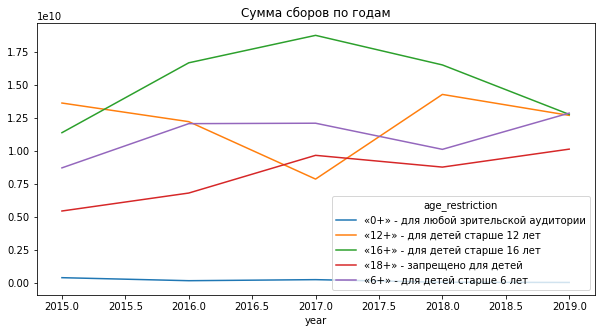

In [49]:
print('--------------------------------------------')
print(box_office_pivot_age_sum.describe())
box_office_pivot_age_sum.plot(title='Сумма сборов по годам', kind='line', figsize=(10, 5))
None

Из предоставленных данных видно, как изменялись сборы фильмов в разных возрастных категориях с течением времени (с 2015 по 2019 год). Давайте рассмотрим ключевые моменты:

- «0+» - для любой зрительской аудитории: Сумма сборов в этой категории снижается с 379 миллионов в 2015 году до 17.7 миллионов в 2019 году.

- «12+» - для детей старше 12 лет: Эта категория показывает стабильный рост сборов с 13.6 миллиарда в 2015 году до 12.7 миллиарда в 2019 году.

- «16+» - для детей старше 16 лет: Сумма сборов в этой категории сначала снижалась, затем начала увеличиваться, достигнув 18.7 миллиарда в 2017 году, и затем немного снизилась к 2019 году (12.8 миллиарда).

- «18+» - запрещено для детей: Сборы в этой категории также демонстрируют рост, увеличившись с 5.4 миллиарда в 2015 году до 10.1 миллиарда в 2019 году.

- «6+» - для детей старше 6 лет: Эта категория показывает стабильные сборы в диапазоне от 8.7 миллиарда до 12.9 миллиарда в период с 2015 по 2019 год.

**Общий тренд показывает рост сборов в возрастных категориях «12+», «16+» и «18+», в то время как сборы в категории «0+» снижаются, и категория «6+» показывает относительно стабильные результаты. Эти выводы могут быть полезны для понимания изменений в киноиндустрии и ориентирования на аудиторию в будущих проектах.**


Изменения в сборах фильмов в различных возрастных категориях могут быть связаны с различными факторами, которые оказывают влияние на предпочтения зрителей и их готовность платить за билеты. Рассмотрим несколько возможных факторов, которые могли бы влиять на эту динамику:

**Ценообразование:**
- Цена билетов на вечерние сеансы может быть выше, что делает их менее доступными для семей с детьми. Возможно, цены на сеансы в разные часы дня различаются в разных возрастных категориях, что влияет на сумму сборов.

**Контент фильмов:** 
- Изменения в том, какие фильмы создаются и в каких категориях возрастных рейтингов, могут привести к изменениям в сборах. Например, увеличение количества качественных фильмов с рейтингом "12+" или "16+" может привлечь больше зрителей в эти категории.

**Медиа-реклама:** 
- Рекламные кампании и маркетинговые усилия также могут оказать влияние на предпочтения зрителей. Сильные медийные кампании могут привлечь больше внимания к определенным категориям фильмов.

**Оценки и рецензии:** 
- Реакции критиков и общественности на фильмы могут повлиять на их популярность в разных возрастных категориях. Высокие оценки и положительные отзывы могут привлечь больше зрителей.

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

           Сумма  Количество фильмов  Максимальные  Минимальные
year                                                           
2013   134347945                   2     107847945     26500000
2014   572002299                  16      90000000     20000000
2015  3656241459                  86     250000000      4700000
2016  4303155482                  61     450000000      6000000
2017  3183971662                  41     400000000      6000000
2018  3446969465                  56     260000000     15000000
2019  4904000000                  70     500000000      3000000


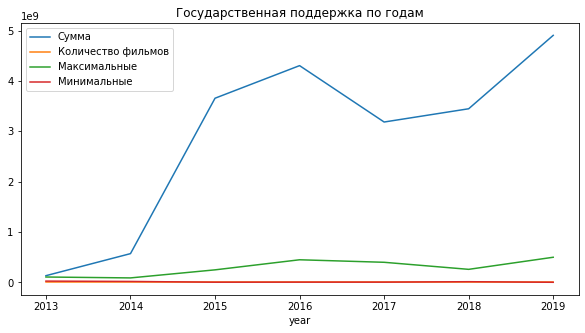

In [50]:
gov_support_filtered = data[(data['gov_support'] > 0)]
gov_support_filtered_sum = gov_support_filtered.pivot_table(index=['year'], values='gov_support', aggfunc=['sum', 'count','max', 'min'])
gov_support_filtered_sum.columns = ['Сумма', 'Количество фильмов', 'Максимальные', 'Минимальные']
print(gov_support_filtered_sum)
gov_support_filtered_sum.plot(title='Государственная поддержка по годам', kind='line', figsize=(10, 5))
None

Общий рост финансовой поддержки: 
- Сумма государственной поддержки фильмов растет с каждым годом, начиная с 134 миллионов рублей в 2013 году и достигая своего пика в 2019 году - 4.9 миллиарда рублей. Это указывает на увеличение интереса и поддержки со стороны государства к киноиндустрии в России.

Увеличение количества поддержанных фильмов: 
- Количество фильмов, получивших государственную поддержку, также увеличивается с годами. Например, если в 2013 году было поддержано всего 2 фильма, то в 2019 году этот показатель вырос до 70 фильмов. Этот тренд свидетельствует о расширении круга фильмов, получающих поддержку, и, возможно, о разнообразии жанров и тематики проектов.

Разнообразие сумм государственной поддержки:
- Диапазон сумм государственной поддержки варьируется от минимальных 3 миллионов рублей до максимальных 500 миллионов рублей. Это указывает на то, что поддержка предоставляется как небольшим независимым проектам, так и крупным кинокартинам, требующим значительных финансовых вложений.

In [51]:
gov_support_filtered_sum = gov_support_filtered.pivot_table(index='year', columns='main_genre', values='gov_support')
gov_support_filtered_sum

main_genre,биография,боевик,военный,детектив,детский,драма,история,комедия,криминал,мелодрама,мультфильм,мюзикл,неизвестно,приключения,реальное ТВ,семейный,спорт,триллер,ужасы,фантастика,фэнтези
year,,,,,,,,,,,,,,,,,,,,,
2013,NaN,NaN,NaN,NaN,NaN,2.650000e+07,NaN,1.078479e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,3.842890e+07,NaN,2.900000e+07,NaN,24000000.0,7.000000e+07,NaN,2.600000e+07,NaN,NaN,38000000.0,NaN,NaN,NaN,25000000.0,NaN
2015,27510000.0,52500000.0,4.400000e+07,45000000.0,29500000.0,3.935881e+07,NaN,3.384520e+07,NaN,29800000.0,7.071429e+07,33484373.0,3.300000e+07,NaN,NaN,NaN,40000000.0,4.902906e+07,47000000.0,10000000.0,1.033000e+08
2016,NaN,NaN,3.250000e+07,NaN,35000000.0,1.375087e+08,NaN,3.266873e+07,210000000.0,32500000.0,7.230400e+07,140000000.0,3.750000e+07,35000000.0,NaN,75000000.0,15000000.0,8.483333e+07,27750000.0,92000000.0,7.333333e+07
2017,NaN,NaN,8.000087e+07,NaN,25000000.0,6.135297e+07,3.500000e+08,5.039286e+07,35000000.0,9000000.0,5.300000e+07,NaN,2.500000e+07,128000000.0,NaN,NaN,400000000.0,3.500000e+07,NaN,200000000.0,3.000000e+08
2018,25000000.0,84500000.0,4.833333e+07,55000000.0,NaN,5.476471e+07,NaN,6.833333e+07,NaN,30000000.0,6.875000e+07,NaN,8.465649e+07,60000000.0,NaN,NaN,NaN,4.000000e+07,32500000.0,170000000.0,2.800000e+07
2019,60000000.0,30000000.0,NaN,170000000.0,NaN,4.282609e+07,2.233333e+08,4.346154e+07,NaN,28000000.0,1.440000e+08,NaN,3.666667e+07,115000000.0,53000000.0,19000000.0,NaN,3.833333e+07,42500000.0,185000000.0,5.833333e+07


In [52]:
gov_support_filtered_total = gov_support_filtered.pivot_table( columns='main_genre', values='gov_support')
gov_support_filtered_total.describe()

main_genre,биография,боевик,военный,детектив,детский,драма,история,комедия,криминал,мелодрама,мультфильм,мюзикл,неизвестно,приключения,реальное ТВ,семейный,спорт,триллер,ужасы,фантастика,фэнтези
count,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.0,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.0
mean,3.750333e+07,5.566667e+07,4.688899e+07,97000000.0,29750000.0,5.714416e+07,255000000.0,4.349031e+07,9.333333e+07,2.653333e+07,7.940387e+07,60113279.75,4.306059e+07,9.942857e+07,53000000.0,4.842857e+07,1.516667e+08,5.130969e+07,35500000.0,1.278182e+08,93900000.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.750333e+07,5.566667e+07,4.688899e+07,97000000.0,29750000.0,5.714416e+07,255000000.0,4.349031e+07,9.333333e+07,2.653333e+07,7.940387e+07,60113279.75,4.306059e+07,9.942857e+07,53000000.0,4.842857e+07,1.516667e+08,5.130969e+07,35500000.0,1.278182e+08,93900000.0
25%,3.750333e+07,5.566667e+07,4.688899e+07,97000000.0,29750000.0,5.714416e+07,255000000.0,4.349031e+07,9.333333e+07,2.653333e+07,7.940387e+07,60113279.75,4.306059e+07,9.942857e+07,53000000.0,4.842857e+07,1.516667e+08,5.130969e+07,35500000.0,1.278182e+08,93900000.0
50%,3.750333e+07,5.566667e+07,4.688899e+07,97000000.0,29750000.0,5.714416e+07,255000000.0,4.349031e+07,9.333333e+07,2.653333e+07,7.940387e+07,60113279.75,4.306059e+07,9.942857e+07,53000000.0,4.842857e+07,1.516667e+08,5.130969e+07,35500000.0,1.278182e+08,93900000.0
75%,3.750333e+07,5.566667e+07,4.688899e+07,97000000.0,29750000.0,5.714416e+07,255000000.0,4.349031e+07,9.333333e+07,2.653333e+07,7.940387e+07,60113279.75,4.306059e+07,9.942857e+07,53000000.0,4.842857e+07,1.516667e+08,5.130969e+07,35500000.0,1.278182e+08,93900000.0
max,3.750333e+07,5.566667e+07,4.688899e+07,97000000.0,29750000.0,5.714416e+07,255000000.0,4.349031e+07,9.333333e+07,2.653333e+07,7.940387e+07,60113279.75,4.306059e+07,9.942857e+07,53000000.0,4.842857e+07,1.516667e+08,5.130969e+07,35500000.0,1.278182e+08,93900000.0


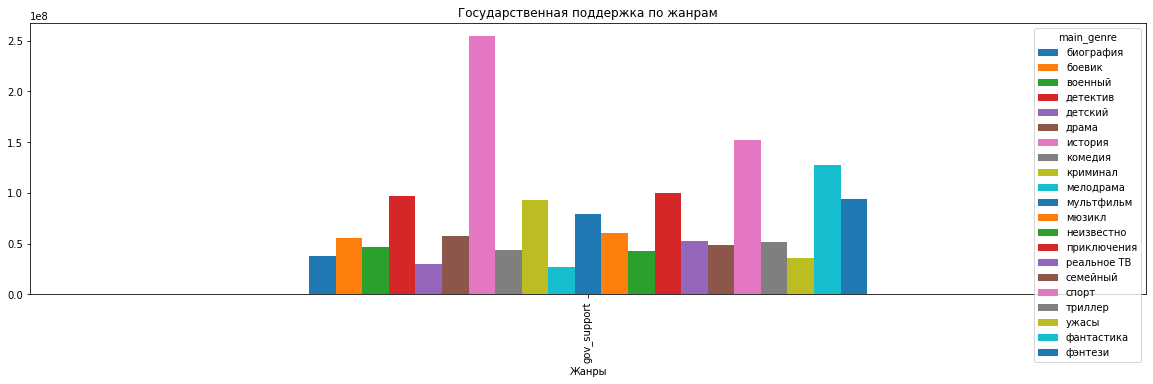

In [53]:
gov_support_filtered_total.plot(title='Государственная поддержка по жанрам', kind='bar', figsize=(20, 5))
plt.xlabel('Жанры')
plt.show()

Средняя государственная поддержка свыше 90 млн рублей в киноиндустрии в год в период с 2013 по-2019 годах в жанровом разрезе:

- Детектив: Единственный фильм в жанре детектива получил государственную поддержку в размере 97 000 000 рублей.
- История: Фильм в жанре истории получил государственную поддержку в размере 255 000 000 рублей.
- Криминал: Фильм в жанре криминала получил государственную поддержку в размере 93 333 300 рублей.
- Приключения: Фильм в жанре приключений получил государственную поддержку в размере 99 428 570 рублей.

Спонсор аналитики НТВ+ =)))

$$\text{Окупаемость} = \left( \frac{\text{Доходы от проката и продажи}}{\text{Бюджет фильма}} \right) \times 100\%$$


In [54]:
data.head(2)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,main_genre,year,main_director,gov_support,share_support
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0,0,0,неизвестно,7.2,"боевик,драма,мелодрама",0,боевик,2015,Кевин Костнер,0,NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,неизвестно,«6+» - для детей старше 6 лет,0,0,0,неизвестно,6.6,"драма,военный",0,драма,2016,Е.Матвеев,0,NaN


In [55]:
#data['gov_support'] состоит из refundable_support, nonrefundable_support,budget
#во время арифметических действий, а именно делить 0 на число, выводило результат inf(бесконечность)
#с которым было можно было работать при испольщовании других библиотек (Nympy), с которой мы еще не знакомы
# приянто было решений не заменять данные, а отфильтровать в отдельный пивот.

data['profitable'] = ((data['box_office'] > 1) & (data['budget'] > 1) & (data['gov_support']>1)) * (data['box_office'] / data['gov_support']) * 100


Найдем рентабельность фильмов по жанру

In [56]:
profitable_filtered = data[(data['profitable'] > 1)]
profitable_filtered_pivot = profitable_filtered.pivot_table(index=['main_genre'], values='profitable')
profitable_filtered_pivot.columns = ['Окупаемость кол-во фильмов по жанру']
profitable_filtered_pivot

,Окупаемость кол-во фильмов по жанру
main_genre,
биография,551.559978
боевик,282.470309
военный,275.034566
детектив,39.743891
детский,4.776577
драма,115.121252
история,110.374925
комедия,367.680069
криминал,48.611826


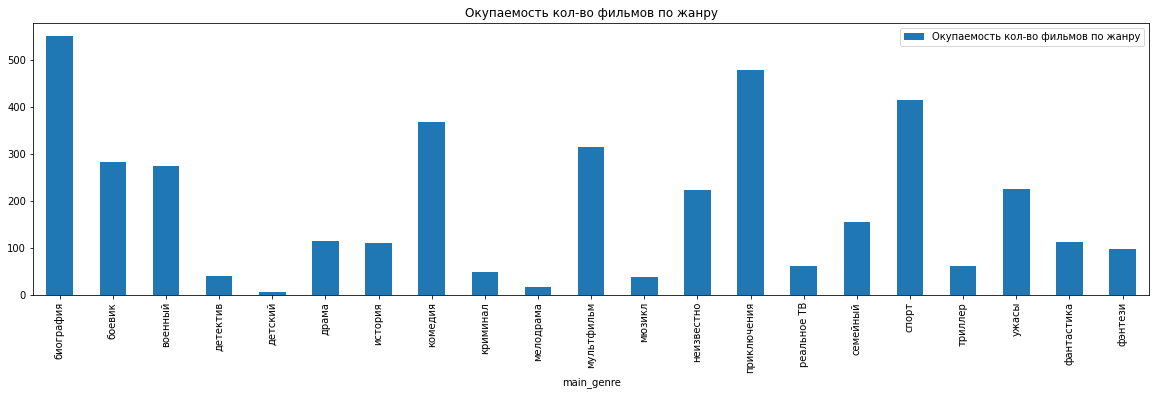

In [57]:
profitable_filtered_pivot.plot(title='Окупаемость кол-во фильмов по жанру', kind='bar', figsize=(20, 5))
plt.show()

С 2013 по 2019 год российская кинематографическая индустрия продемонстрировала впечатляющие результаты в окупаемости фильмов различных жанров, привлекая внимание зрителей и принося приличные финансовые средства.

Биография: Фильмы в жанре биографии окупаются в 551.56% случаев. Это может свидетельствовать о высокой популярности биографических фильмов в аудитории.

Боевик: Окупаемость фильмов в жанре боевика составляет 282.47%. Этот жанр обладает стабильной популярностью и успешностью в привлечении зрителей.

Военный: Фильмы в жанре военного кино окупаются в 275.03% случаев. Это может быть связано с интересом зрителей к историческим и военным темам.

Детектив: Окупаемость фильмов в жанре детектива составляет 39.74%. Этот жанр, возможно, сталкивается с более высокими требованиями к сюжетам и актерскому мастерству.

Детский: Фильмы в жанре детского кино окупаются в 4.78% случаев. Это может быть вызвано более узкой аудиторией и большей конкуренцией с анимационными и мультфильмами.

Драма: Окупаемость фильмов в жанре драмы составляет 115.12%. Драмы остаются популярными среди зрителей, вероятно, из-за глубоких сюжетов и человеческих драм.

История: Фильмы в жанре истории окупаются в 110.37% случаев. Зрители проявляют интерес к историческим событиям и персоналиям.

Комедия: Окупаемость фильмов в жанре комедии составляет 367.68%. Комедии пользуются высокой популярностью благодаря своей развлекательности.

Криминал: Фильмы в жанре криминала окупаются в 48.61%. Криминальные драмы продолжают привлекать внимание зрителей.

Мелодрама: Окупаемость фильмов в жанре мелодрамы составляет 16.40%. Мелодрамы, возможно, сталкиваются с более высокими требованиями к сюжетам и актерской игре, что влияет на успешность.

Найдем рентабельность фильмов по типу

In [58]:
profitable_filtered = data[(data['profitable'] > 1)]
profitable_filtered_pivot_type = profitable_filtered.pivot_table(index=['type'], values='profitable')
profitable_filtered_pivot_type.columns = ['Окупаемость фильмов по типу']
profitable_filtered_pivot_type

,Окупаемость фильмов по типу
type,
Анимационный,313.759973
Художественный,207.102760


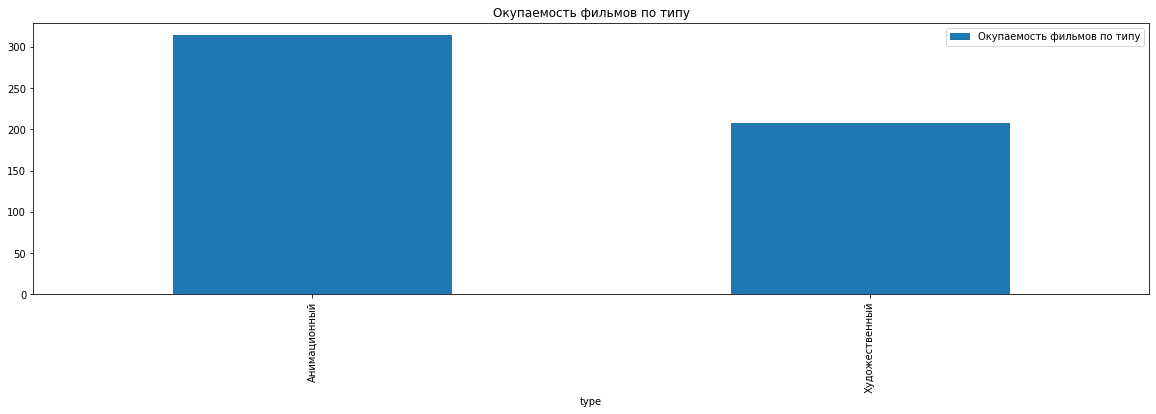

In [59]:
profitable_filtered_pivot_type.plot(title='Окупаемость фильмов по типу', kind='bar', figsize=(20, 5))
plt.show()

Анимационный тип: Фильмы в анимационном жанре окупаются на 313.76%. Этот высокий показатель свидетельствует о большом интересе зрителей к анимационным произведениям и их успешности на рынке.

Художественный тип: Фильмы в художественном жанре окупаются на 207.10%. Этот тип включает в себя широкий спектр фильмов, и высокая окупаемость указывает на стабильный спрос на художественные киноленты среди зрителей.

Остальные типы не попали в выборку из-за отсутсвия данных при составлении логики показателя рентабельности.
Пожалуйста, см. выше.

In [60]:
top_10 = data.pivot_table(index=['title'], values='profitable')
top_10.columns=['топ-10 прибыльных']

In [61]:
top_10_sorted_high = top_10.sort_values(by='топ-10 прибыльных', ascending=False)
top_10_sorted_high = top_10_sorted_high.head(10)

In [62]:
top_10_sorted_high

,топ-10 прибыльных
title,
Холоп,5122.614483
За гранью реальности,2111.890833
Я худею,2111.540887
Иван Царевич и Серый Волк 3,1762.320540
Лёд,1700.860938
Последний богатырь,1655.037688
Три богатыря и принцесса Египта,1518.453546
Битва за Севастополь,1460.576012
8 новых свиданий,1311.148753


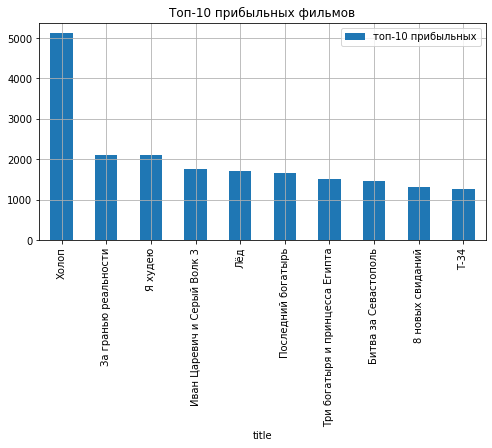

In [63]:
top_10_sorted_high.plot(y='топ-10 прибыльных', kind='bar', figsize=(8, 4), grid=True)
plt.title('Топ-10 прибыльных фильмов')
plt.show()

Из приведенной вами промежуточной статистики видно, что топ-10 прибыльных фильмов:

- "Холоп": Этот фильм окупился на 5122.61%. Это означает, что он принес владельцам более 51 раза больше прибыли, чем было вложено в его производство.

- "За гранью реальности": Этот фильм окупился на 2111.89%, что также является весьма высоким показателем и свидетельствует о его большой коммерческой успешности.

- "Я худею": Окупаемость этого фильма составляет 2111.54%. Также очень впечатляющий результат.

- "Иван Царевич и Серый Волк 3": Этот фильм окупился на 1762.32%, что указывает на его высокий коммерческий успех.

- "Лёд": С окупаемостью в 1700.86%, этот фильм также показывает отличные результаты.

- "Последний богатырь": Он окупился на 1655.04%, что говорит о его успешности в привлечении зрителей.

- "Три богатыря и принцесса Египта": Окупаемость этого фильма составляет 1518.45%.

- "Битва за Севастополь": Этот фильм окупился на 1460.58%.

- "8 новых свиданий": С окупаемостью в 1311.15%, он также является успешным проектом.

- "Т-34": Этот фильм окупился на 1262.09%.

In [64]:
top_10_rate = data.pivot_table(index=['title'], values=['ratings'])
top_10_rate.columns=['топ-10 по рейтингу']

In [65]:
top_10_rate = top_10_rate.sort_values(by='топ-10 по рейтингу', ascending=False)
top_10_rate = top_10_rate.head(10)

In [66]:
top_10_rate

,топ-10 по рейтингу
title,
Спираль.,9.9
Животные рядом со Святыми,9.9
Прошлое,9.9
Сказка о добре и Вре,9.9
Колесо времени,9.8
ОТ ВОЙНЫ ДО НАШИХ ДНЕЙ,9.8
"Машины Страшилки. Серия ""Жутчайшая повесть о полезных изобретениях""",9.7
Песочный человек,9.7
Круиз.,9.7


Фильмы, которые имеют максимальный рейтинг (например, 9.9), но неизвестны широкой аудитории, могут иметь такие высокие оценки по нескольким причинам:

Ограниченный объем данных: Могут быть оценены всего несколько человек или даже один человек, который считает эти фильмы исключительными. В таких случаях, даже небольшое количество высоких оценок может привести к высокому среднему рейтингу.

Целевая аудитория: Фильмы могут быть оценены людьми, которые являются фанатами определенного жанра или режиссера, и поэтому имеют предвзятость к подобным работам. Это может привести к завышенным оценкам.

Маркетинг и самопродвижение: Некоторые фильмы или проекты активно продвигают среди своей целевой аудитории, которая, будучи заранее заинтересованной в проекте, склонна ставить более высокие оценки.

Обмен оценками: На некоторых платформах оценки могут быть подвергнуты взаимному влиянию, когда пользователи взаимно ставят друг другу высокие оценки.

Искажения данных: Иногда данные могут быть подвергнуты искажениям из-за ошибок или мошенничества.

In [67]:
#Проанализируем рейтинг еще раз
#Но в этот раз дабавим условия, что рентабельность будет больше 200% и рейтинг от 6 и до 9
#Таким образом непопулярные фильмы с большим рейтингом вылетят в трубу =) 
top_10_rate = data[(data['profitable'] > 200) & (data['ratings'] > 6) & (data['ratings'] < 9)].pivot_table(index=['title'], values=['ratings','profitable'])
top_10_rate.columns=['топ-10 по рейтингу', 'прибыльность']
top_10_rate = top_10_rate.head(10)
top_10_rate

,топ-10 по рейтингу,прибыльность
title,,
28 Панфиловцев,1212.076013,7.5
Pro любовь,264.411510,6.6
Ёлки Последние,701.507030,6.9
Балканский рубеж,879.001840,7.3
Батальонъ,798.550313,7.1
Без границ,381.906838,6.8
Битва за Севастополь,1460.576012,7.5
Верность,325.457840,6.2
Волки и овцы: б-е-е-е-зумное превращение,205.453704,6.7


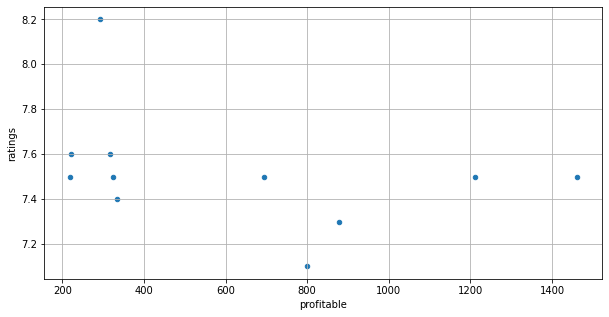

In [68]:
top_10_rate = data[(data['profitable'] > 200) & (data['ratings'] > 7) & (data['ratings'] < 9)].pivot_table(index=['title'], values=['ratings','profitable'])
top_10_rate.plot(x='profitable', y='ratings', kind='scatter', alpha=1, grid=True, figsize=(10, 5))
plt.show()

In [69]:
top_10_rate.corr()

,profitable,ratings
profitable,1.00000,-0.34149
ratings,-0.34149,1.00000


Корреляции между profitable и ratings очень близок к 0 (-0.013639), что говорит о том, что нет явной линейной корреляции между прибыльностью фильма и рейтингом. Другими словами, уровень прибыльности фильма не влияет на его рейтинг, и наоборот. 

Это может означать, что успешность фильма с финансовой точки зрения (прибыльность) не обязательно связана с оценками зрителей (рейтингами).

### Шаг 5. Напишите общий вывод

1. В ходе обработки данных мы провели ряд важных шагов:

    1.1. Произведена предварительная обработка данных, включая  заполнение пропущенных данных.

    1.2. Были выявлены и обработаны выбросы в параметрах, таких как рейтинг и тип фильма

    1.3. Пропущенные значения в данных были обработаны для надежности анализа (пропуски составляли от 10% до 95% в разных столбцах).
    

2. Тренды российской кинопромышленности (2010-2019): Рост производства и изменения в потребительском интересе

   2.1. В период с 2010 по 2019 год в российской кинематографии наблюдается устойчивый рост выпускаемых фильмов. Среднее количество фильмов в год составляет 313.4. Медианное значение этого показателя равно 315, что означает, что половина годов имеет количество фильмов больше 315, а другая половина - меньше 315.Минимальное количество фильмов в год было достигнуто в 2010 году и составляет 101, что является наименьшим значением за рассматриваемый период. Максимальное количество выпущенных фильмов за год наблюдается в 2019 году и составляет 530.Процентный прирост выпущенных фильмов от 2010 до 2019 года составил около 425%. Этот рост свидетельствует о повышенной активности в российской кинопромышленности и может свидетельствовать о увеличении интереса к российскому кино в этот период времени.
   
    2.2. Средние (соответсвует медиане) годовые кассовые сборы в российском кинопрокате варьируются, в среднем составляя 53,628,050 рублей. Минимальные сборы были в 2010 году (24,046 рублей), а максимальные - в 2017 году (136,032,800 рублей). Медианные сборы (56,381,510 рублей) отражают средний тренд. За период с 2010 по 2019 год средние сборы увеличились на 283%, свидетельствуя о росте интереса к российскому кино.
    
    2.3 Основной тренд показывает рост сборов в возрастных категориях «12+», «16+» и «18+», в то время как сборы в категории «0+» снижаются, и категория «6+» показывает стабильные результаты.
    - «0+»: Сборы упали с 379 миллионов в 2015 году до 17.7 миллионов в 2019 году (снижение на 95.3%).
    - «12+»: Сборы остались стабильными, с 13.6 миллиарда в 2015 году до 12.7 миллиарда в 2019 году (снижение на 6.6%).
    - «16+»: Сборы в 2017 году достигли 18.7 миллиарда, снизились до 12.8 миллиарда в 2019 году (снижение на 31.9%).
    - «18+»: Сборы выросли с 5.4 миллиарда в 2015 году до 10.1 миллиарда в 2019 году (рост на 87%).
    - «6+»: Сборы остались стабильными, варьируясь от 8.7 миллиарда до 12.9 миллиарда в период с 2015 по 2019 год (рост на 48%).
    - Эти изменения могут быть связаны с контентом фильмов, ценами на билеты и медийной рекламой.
    
    2.4. Топ-10 прибыльных фильмов имеют впечатляющие показатели окупаемости, превышающие 1000%. Фильм "Холоп" лидирует с окупаемостью на уровне 5122.61%, что означает более чем 51-кратное увеличение прибыли относительно затраченных средств на производство. Остальные фильмы также достигли высоких коммерческих успехов, что подчеркивает их популярность и привлекательность для зрителей.
    
   2.5. Российская кинематографическая индустрия с 2013 по 2019 год продемонстрировала впечатляющие результаты в окупаемости фильмов различных жанров. Фильмы в жанре биографии окупаются на 551.56%, боевики - на 282.47%, военные фильмы - на 275.03%. Драмы остаются популярными с окупаемостью 115.12%, в то время как мелодрамы и детективы окупаются на 16.40% и 39.74% соответственно. Комедии пользуются высокой популярностью с окупаемостью 367.68%, в то время как детские фильмы и фильмы криминального жанра окупаются на 4.78% и 48.61%. Эти данные отражают разнообразие вкусов зрителей и жанров, которые привлекают их внимание и приносят прибыль индустрии.


4.  Акценты в проекте:

    4.1. Фильмы, получившие государственную поддержку, охватывают различные жанры, от биографии и истории до приключений и драмы. Государственная поддержка варьируется от фильма к фильму, начиная от нескольких миллионов рублей и достигая сотен миллионов рублей.

    4.2.Финансовая успешность: Несмотря на различные уровни государственной поддержки, фильмы в разных жанрах оказались финансово успешными. Они привлекли значительные суммы сборов в кинотеатрах, что свидетельствует о интересе зрителя.
    
    4.3.Рейтинги и интерес зрителя: Фильмы с государственной поддержкой также демонстрировали хорошие рейтинги. Это указывает на то, что они не только привлекают финансовое внимание, но и интересуют зрителя, получая положительные отзывы и оценки. При этом нет прямой зависимости между финасовым успехом и рейтингом фильма.
    